<a href="https://colab.research.google.com/github/Cove1946/Tarea-Teor-a-cu-ntica-b-sica-Observables-y-Medidas/blob/main/TeoriaCuanticaBasica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Teoria cuantica basica, Observables y Medidas

**Nombre:** Cristian Ronaldo Guerrero Buitrago

### Simule el primer sistema cuantico descrito en la seccion 4.1
El sistema consiste en una particula confinada a un conjunto discreto de posiciones en una linea. El simulador debe permitir especificar el numero de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posicion en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.


In [ ]:
import numpy as np

class SistemaCuanticoDiscreto:
    def __init__(self, numero_posiciones):
        # Inicializa el sistema cuantico con un numero dado de posiciones
        self.numero_posiciones = numero_posiciones
        self.vector_estado = np.zeros(numero_posiciones, dtype=complex)

    def establecer_vector_estado(self, amplitudes):
        # Establece el vector de estado (ket) con las amplitudes proporcionadas
        # y normaliza el vector
        if len(amplitudes) != self.numero_posiciones:
            raise ValueError("El numero de amplitudes no coincide con el numero de posiciones.")
        self.vector_estado = np.array(amplitudes, dtype=complex)
        norma = np.linalg.norm(self.vector_estado)
        if norma == 0:
            raise ValueError("El vector de estado no puede tener norma cero.")
        self.vector_estado = self.vector_estado / norma
        print(f"Vector de estado establecido y normalizado: {self.vector_estado}")

    def probabilidad_en_posicion(self, posicion):
        # Calcula la probabilidad de encontrar la particula en una posicion especifica
        if posicion < 0 or posicion >= self.numero_posiciones:
            raise ValueError("La posicion esta fuera del rango valido.")
        probabilidad = np.abs(self.vector_estado[posicion])**2
        print(f"Probabilidad de encontrar la particula en la posicion {posicion}: {probabilidad:.4f}")
        return probabilidad

    def probabilidad_transicion(self, estado_final):
        # Calcula la probabilidad de transicion entre el estado actual y otro estado (ket)
        if len(estado_final) != self.numero_posiciones:
            raise ValueError("El vector del estado final no coincide en dimension.")
        estado_final_normalizado = np.array(estado_final, dtype=complex)
        estado_final_normalizado = estado_final_normalizado / np.linalg.norm(estado_final_normalizado)
        producto_interno = np.vdot(estado_final_normalizado, self.vector_estado)
        prob_transicion = np.abs(producto_interno)**2
        print(f"Probabilidad de transicion del estado actual al estado final: {prob_transicion:.4f}")
        return prob_transicion

    def mostrar_info_sistema(self):
        # Muestra informacion completa del sistema cuantico
        print("=== Informacion del Sistema Cuantico Discreto ===")
        print(f"Numero de posiciones: {self.numero_posiciones}")
        print(f"Vector de estado (normalizado): {self.vector_estado}")
        print("Probabilidades por posicion:")
        for i in range(self.numero_posiciones):
            print(f"  Posicion {i}: {np.abs(self.vector_estado[i])**2:.4f}")

# Ejemplo de uso del sistema cuantico discreto
sistema_cuantico = SistemaCuanticoDiscreto(3)
amplitudes_iniciales = [4 + 6j, 3, -5j]
sistema_cuantico.establecer_vector_estado(amplitudes_iniciales)
sistema_cuantico.mostrar_info_sistema()

# Calcular probabilidad en una posicion especifica
sistema_cuantico.probabilidad_en_posicion(0)

# Calcular probabilidad de transicion a otro estado
estado_final = [3, 0, 2j]
sistema_cuantico.probabilidad_transicion(estado_final)


Vector de estado establecido y normalizado: [ 0.43133109+0.64699664j  0.32349832+0.j         -0.        -0.53916387j]
=== Informacion del Sistema Cuantico Discreto ===
Numero de posiciones: 3
Vector de estado (normalizado): [ 0.43133109+0.64699664j  0.32349832+0.j         -0.        -0.53916387j]
Probabilidades por posicion:
  Posicion 0: 0.6047
  Posicion 1: 0.1047
  Posicion 2: 0.2907
Probabilidad de encontrar la particula en la posicion 0: 0.6047
Probabilidad de transicion del estado actual al estado final: 0.2934


np.float64(0.2933810375670841)

###Complete los retos de programación del capítulo 4.

##1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [ ]:
import numpy as np

def amplitud_transicion(estado_inicial, estado_final):
    """
    Reto 1: Calcular la amplitud de transicion entre dos estados cuanticos.
    """
    estado_inicial = np.array(estado_inicial, dtype=complex)
    estado_final = np.array(estado_final, dtype=complex)

    # Validar que los vectores no sean nulos
    if np.linalg.norm(estado_inicial) == 0 or np.linalg.norm(estado_final) == 0:
        raise ValueError("Los vectores de estado no pueden ser nulos.")

    # Normalizar los estados
    estado_inicial_norm = estado_inicial / np.linalg.norm(estado_inicial)
    estado_final_norm = estado_final / np.linalg.norm(estado_final)

    # Calcular la amplitud de transicion <phi|psi>
    amplitud = np.vdot(estado_final_norm, estado_inicial_norm)
    probabilidad = np.abs(amplitud)**2

    print(f"Estado inicial |ψ>: {estado_inicial_norm}")
    print(f"Estado final |φ>: {estado_final_norm}")
    print(f"Amplitud de transicion <φ|ψ>: {amplitud}")
    print(f"Probabilidad de transicion |<φ|ψ>|^2: {probabilidad:.6f}")

    return amplitud, probabilidad


print("--- Prueba del Reto 1 ---")

# Caso 1: Estados ortogonales (probabilidad = 0)
estado_a = [1, 0]
estado_b = [0, 1]

amplitud, probabilidad = amplitud_transicion(estado_a, estado_b)

print("\n--- Prueba del Reto 1 (Estados no ortogonales) ---")

# Caso 2: Estados no ortogonales (probabilidad entre 0 y 1)
estado_c = [1/np.sqrt(2), 1/np.sqrt(2)]
estado_d = [np.sqrt(3)/2, 1/2]

amplitud2, probabilidad2 = amplitud_transicion(estado_c, estado_d)



--- Prueba del Reto 1 ---
Estado inicial |ψ>: [1.+0.j 0.+0.j]
Estado final |φ>: [0.+0.j 1.+0.j]
Amplitud de transicion <φ|ψ>: 0j
Probabilidad de transicion |<φ|ψ>|^2: 0.000000

--- Prueba del Reto 1 (Estados no ortogonales) ---
Estado inicial |ψ>: [0.70710678+0.j 0.70710678+0.j]
Estado final |φ>: [0.8660254+0.j 0.5      +0.j]
Amplitud de transicion <φ|ψ>: (0.9659258262890685+0j)
Probabilidad de transicion |<φ|ψ>|^2: 0.933013


##2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [ ]:
import numpy as np

def analisis_observable(matriz_observable, vector_estado):
    """
    Reto 2: Analizar propiedades de un observable y calcular estadisticas, con una matriz.
    """
    omega = np.array(matriz_observable, dtype=complex)
    estado = np.array(vector_estado, dtype=complex)
    estado = estado / np.linalg.norm(estado)  # Normalizar el vector de estado


    # Verificar si la matriz es hermitiana
    es_hermitiana = np.allclose(omega, omega.conj().T)
    print(f"Verificacion hermitiana: {es_hermitiana}")

    if not es_hermitiana:
        print(" La matriz no es hermitiana, no es un observable valido!")
        return {"hermitiana": False, "media": None, "varianza": None}

    # Calcular el valor medio ⟨ψ|Ω|ψ⟩
    valor_medio = np.real(np.vdot(estado, omega @ estado))

    # Calcular ⟨ψ|Ω²|ψ⟩
    omega_cuadrado = omega @ omega
    media_cuadrado = np.real(np.vdot(estado, omega_cuadrado @ estado))

    # Calcular varianza y desviacion estandar
    varianza = media_cuadrado - valor_medio**2
    desviacion_estandar = np.sqrt(varianza)

    print("Matriz observable Ω:")
    print(omega)
    print("Estado |ψ⟩:", estado)
    print(f"Valor medio ⟨Ω⟩ = ⟨ψ|Ω|ψ⟩: {valor_medio:.6f}")
    print(f"⟨Ω²⟩ = ⟨ψ|Ω²|ψ⟩: {media_cuadrado:.6f}")
    print(f"Varianza Var(Ω) = ⟨Ω²⟩ - ⟨Ω⟩²: {varianza:.6f}")
    print(f"Desviacion estandar σ: {desviacion_estandar:.6f}")

    return {
        "hermitiana": True,
        "media": valor_medio,
        "varianza": varianza,
        "desviacion_estandar": desviacion_estandar,
        "media_cuadrado": media_cuadrado
    }

# Reto 2: Analisis de Observable
print("--- Prueba Reto 2 ---")

# Definimos una matriz observable hermitiana
matriz_observable = np.array([
    [2, -1j],
    [1j, 3]
], dtype=complex)

# Definimos un vector de estado normalizado
estado_prueba = [1/np.sqrt(3), np.sqrt(2)/np.sqrt(3)]

# Ejecutamos el analisis del observable
resultado = analisis_observable(matriz_observable, estado_prueba)



--- Prueba Reto 2 ---
Verificacion hermitiana: True
Matriz observable Ω:
[[ 2.+0.j -0.-1.j]
 [ 0.+1.j  3.+0.j]]
Estado |ψ⟩: [0.57735027+0.j 0.81649658+0.j]
Valor medio ⟨Ω⟩ = ⟨ψ|Ω|ψ⟩: 2.666667
⟨Ω²⟩ = ⟨ψ|Ω²|ψ⟩: 8.333333
Varianza Var(Ω) = ⟨Ω²⟩ - ⟨Ω⟩²: 1.222222
Desviacion estandar σ: 1.105542


###3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [ ]:
import numpy as np

def probabilidades_autovalores(matriz_observable, vector_estado):
    """
    Reto 3: Calcular los autovalores y las probabilidades de transicion a los autovectores.
    """
    observable = np.array(matriz_observable, dtype=complex)
    estado = np.array(vector_estado, dtype=complex)
    estado = estado / np.linalg.norm(estado)  # Normalizar el estado

    # Calcular autovalores y autovectores
    autovalores, autovectores = np.linalg.eigh(observable)

    print("Analisis de autovalores del observable:")
    print(f"Autovalores: {autovalores}")

    # Calcular las probabilidades de transicion a cada autovector
    probabilidades = []
    for i, autovector in enumerate(autovectores.T):
        # Normalizar el autovector
        autovector = autovector / np.linalg.norm(autovector)

        # Calcular la probabilidad de transicion
        amplitud = np.vdot(autovector, estado)
        probabilidad = np.abs(amplitud)**2
        probabilidades.append(probabilidad)

        print(f"Autovalor λ_{i+1} = {autovalores[i]:.6f}")
        print(f"  Autovector |e_{i+1}⟩: {autovector}")
        print(f"  Amplitud de transicion ⟨e_{i+1}|ψ⟩: {amplitud}")
        print(f"  Probabilidad de transicion: {probabilidad:.6f}")

    # Verificar que las probabilidades sumen 1
    prob_total = sum(probabilidades)
    print(f"\nProbabilidad total: {prob_total:.6f}")

    return {
        "autovalores": autovalores,
        "autovectores": autovectores.T,
        "probabilidades": probabilidades,
        "probabilidad_total": prob_total
    }


# Reto 3: Probabilidades de Autovalores
print("--- Prueba Reto 3 ---")

# Observable: Matriz de Pauli-X (representa un operador de espin en la direccion x)
observable_x = np.array([[0, 1],
                         [1, 0]], dtype=complex)

# Estado cuantico: combinacion desigual de |0> y |1>
estado_prueba = [np.sqrt(3)/2, 1/2]  # Normalizado (|a|^2 + |b|^2 = 1)

# Analisis de autovalores y probabilidades
analisis_autovalores = probabilidades_autovalores(observable_x, estado_prueba)


--- Prueba Reto 3 ---
Analisis de autovalores del observable:
Autovalores: [-1.  1.]
Autovalor λ_1 = -1.000000
  Autovector |e_1⟩: [-0.70710678+0.j  0.70710678+0.j]
  Amplitud de transicion ⟨e_1|ψ⟩: (-0.25881904510252085+0j)
  Probabilidad de transicion: 0.066987
Autovalor λ_2 = 1.000000
  Autovector |e_2⟩: [0.70710678+0.j 0.70710678+0.j]
  Amplitud de transicion ⟨e_2|ψ⟩: (0.9659258262890685+0j)
  Probabilidad de transicion: 0.933013

Probabilidad total: 1.000000


###4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [ ]:
import numpy as np

def dinamica_sistema(estado_inicial, matrices_unitarias):
    """
    Reto 4: Calcular el estado final despues de aplicar una serie de transformaciones unitarias.
    """
    estado = np.array(estado_inicial, dtype=complex)
    estado = estado / np.linalg.norm(estado)  # Normalizar el estado inicial

    print(f"Estado inicial |psi0>: {estado}")

    estados_intermedios = [estado.copy()]

    # Aplicar cada transformacion unitaria de forma secuencial
    for i, matriz in enumerate(matrices_unitarias):
        U = np.array(matriz, dtype=complex)

        # Verificar si la matriz es unitaria
        es_unitaria = np.allclose(U @ U.conj().T, np.eye(U.shape[0]))
        if not es_unitaria:
            print(f"La matriz U_{i+1} no es unitaria!")
            continue

        # Aplicar la transformacion
        estado = U @ estado
        estados_intermedios.append(estado.copy())

        print(f"\nPaso {i+1}:")
        print(f"  Matriz unitaria U_{i+1}:")
        for fila in U:
            print(f"    {fila}")
        print(f"  Estado despues de U_{i+1}: |psi_{i+1}> = {estado}")
        print(f"  Verificacion de norma: {np.linalg.norm(estado):.6f}")

    print(f"\nEstado final |psi_final>: {estado}")
    print(f"Norma del estado final: {np.linalg.norm(estado):.6f}")

    return estado, estados_intermedios


print("--- Prueba Reto 4 ---")

# Estado inicial en superposicion
estado_inicial = [1/np.sqrt(2), 1j/np.sqrt(2)]

# Matriz de rotacion (rotacion de fase pi/4)
rotacion_fase = np.array([
    [1, 0],
    [0, np.exp(1j * np.pi / 4)]
], dtype=complex)

# Matriz de Pauli-Z (cambia la fase del estado |1>)
pauli_z = np.array([
    [1, 0],
    [0, -1]
], dtype=complex)

# Secuencia de transformaciones unitarias
secuencia_unitaria = [rotacion_fase, pauli_z]

# Ejecutar la dinamica del sistema
estado_final, estados_intermedios = dinamica_sistema(estado_inicial, secuencia_unitaria)



--- Prueba Reto 4 ---
Estado inicial |psi0>: [0.70710678+0.j         0.        +0.70710678j]

Paso 1:
  Matriz unitaria U_1:
    [1.+0.j 0.+0.j]
    [0.        +0.j         0.70710678+0.70710678j]
  Estado despues de U_1: |psi_1> = [ 0.70710678+0.j  -0.5       +0.5j]
  Verificacion de norma: 1.000000

Paso 2:
  Matriz unitaria U_2:
    [1.+0.j 0.+0.j]
    [ 0.+0.j -1.+0.j]
  Estado despues de U_2: |psi_2> = [0.70710678+0.j  0.5       -0.5j]
  Verificacion de norma: 1.000000

Estado final |psi_final>: [0.70710678+0.j  0.5       -0.5j]
Norma del estado final: 1.000000


###Ejercicio 4.3.1

Encuentre todos los estados posibles a los que puede llegar el sistema descrito en el Ejercicio 4.2.2 tras realizar una medición.

Segun lo que nos dice el marco teórico, cuando se realiza una medición observable en un sistema cuantico, este colapsa a uno de los vectores propios correspondientes al valor propio observado

In [ ]:
import numpy as np
from typing import List

class MedicionObservable:
    """
    Implementa el postulado de medicion: al medir un observable Ω y obtener
    un autovalor λ, el sistema colapsa al autovector correspondiente.
    """

    def __init__(self, matriz_observable: np.ndarray):
        """
        Inicializa con una matriz observable (Hermitiana).
        """
        self.observable = np.array(matriz_observable, dtype=complex)

        if not self._es_hermitiana():
            raise ValueError("La matriz observable debe ser Hermitiana.")

        # Calcular autovalores y autovectores
        self.autovalores, self.autovectores = np.linalg.eigh(self.observable)

        print("=== Sistema de Medicion Cuantica Inicializado ===")
        print(f"Forma de la matriz observable: {self.observable.shape}")
        print(f"Autovalores: {self.autovalores}")
        print(f"Hermitiana: {self._es_hermitiana()}")
        print()

    def _es_hermitiana(self, tolerancia: float = 1e-10) -> bool:
        """
        Verifica si la matriz observable es Hermitiana.
        """
        conjugada_hermitiana = np.conj(self.observable.T)
        return np.allclose(self.observable, conjugada_hermitiana, atol=tolerancia)

    def obtener_estados_posibles_despues_medicion(self) -> List[np.ndarray]:
        """
        Obtiene todos los posibles estados cuanticos despues de la medicion.
        """
        estados_posibles = []

        print("=== Estados Posibles Despues de la Medicion ===")

        for i, (autovalor, autovector) in enumerate(zip(self.autovalores, self.autovectores.T)):
            # Normalizar el autovector
            autovector_normalizado = autovector / np.linalg.norm(autovector)
            estados_posibles.append(autovector_normalizado)

            print(f"Estado {i+1}:")
            print(f"  Autovalor λ_{i+1} = {autovalor:.6f}")
            print(f"  Autovector |e_{i+1}> = {autovector_normalizado}")
            print(f"  Norma = {np.linalg.norm(autovector_normalizado):.6f}")
            print()

        return estados_posibles

    def calcular_probabilidades_medicion(self, estado_inicial: np.ndarray) -> List[float]:
        """
        Calcula las probabilidades de colapsar a cada posible estado despues de la medicion.
        """
        estado_inicial = np.array(estado_inicial, dtype=complex)

        # Normalizar el estado inicial si no lo esta
        if not np.isclose(np.linalg.norm(estado_inicial), 1.0):
            estado_inicial = estado_inicial / np.linalg.norm(estado_inicial)

        probabilidades = []

        print("=== Probabilidades de Transicion en la Medicion ===")
        print(f"Estado inicial |ψ> = {estado_inicial}")
        print()

        for i, autovector in enumerate(self.autovectores.T):
            # Calcular |<e_i|ψ>|²
            producto_interno = np.vdot(autovector, estado_inicial)
            probabilidad = np.abs(producto_interno)**2
            probabilidades.append(float(probabilidad))

            print(f"P(colapsar a |e_{i+1}>) = |<e_{i+1}|ψ>|² = {probabilidad:.6f}")
            print(f"  Producto interno <e_{i+1}|ψ> = {producto_interno:.6f}")

        print(f"\nProbabilidad total: {sum(probabilidades):.6f}")

        return probabilidades




print("=== SOLUCION: Ejercicio 4.3.1 ===")

# Observable Sx (en unidades de ħ/2)
matriz_observable = np.array([
    [0, 1],
    [1, 0]
], dtype=complex)

print("Matriz observable Ω (Sx):")
print(matriz_observable)
print()

# Crear el sistema de medicion
sistema_medicion = MedicionObservable(matriz_observable)

# Obtener los posibles estados despues de la medicion
estados_posibles = sistema_medicion.obtener_estados_posibles_despues_medicion()

print("=== Resumen del Ejercicio 4.3.1 ===")
print(f"El sistema puede colapsar en {len(estados_posibles)} posibles estados despues de la medicion:\n")
for i, estado in enumerate(estados_posibles):
    print(f"  Estado {i+1}: {estado}")

# Verificar que se cumpla Ω|e> = λ|e>
print("\n=== Verificacion: Ecuacion de Autovalor ===")
for i, (autovalor, autovector) in enumerate(zip(sistema_medicion.autovalores, estados_posibles)):
    lhs = matriz_observable @ autovector  # Ω|e>
    rhs = autovalor * autovector          # λ|e>
    print(f"Para λ_{i+1} = {autovalor:.6f}:")
    print(f"  Ω|e_{i+1}> = {lhs}")
    print(f"  λ_{i+1}|e_{i+1}> = {rhs}")
    print(f"  Coinciden: {np.allclose(lhs, rhs)}")
    print()


=== SOLUCION: Ejercicio 4.3.1 ===
Matriz observable Ω (Sx):
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

=== Sistema de Medicion Cuantica Inicializado ===
Forma de la matriz observable: (2, 2)
Autovalores: [-1.  1.]
Hermitiana: True

=== Estados Posibles Despues de la Medicion ===
Estado 1:
  Autovalor λ_1 = -1.000000
  Autovector |e_1> = [-0.70710678+0.j  0.70710678+0.j]
  Norma = 1.000000

Estado 2:
  Autovalor λ_2 = 1.000000
  Autovector |e_2> = [0.70710678+0.j 0.70710678+0.j]
  Norma = 1.000000

=== Resumen del Ejercicio 4.3.1 ===
El sistema puede colapsar en 2 posibles estados despues de la medicion:

  Estado 1: [-0.70710678+0.j  0.70710678+0.j]
  Estado 2: [0.70710678+0.j 0.70710678+0.j]

=== Verificacion: Ecuacion de Autovalor ===
Para λ_1 = -1.000000:
  Ω|e_1> = [ 0.70710678+0.j -0.70710678+0.j]
  λ_1|e_1> = [ 0.70710678-0.j -0.70710678+0.j]
  Coinciden: True

Para λ_2 = 1.000000:
  Ω|e_2> = [0.70710678+0.j 0.70710678+0.j]
  λ_2|e_2> = [0.70710678+0.j 0.70710678+0.j]
  Coinciden: True


###Ejercicio 4.3.2

Calcule las probabilidades de que el vector de estado caiga en uno de los dos vectores propios y calcule el valor medio de la distribución.

=== Ejercicio 4.3.2 ===
Calculo de probabilidades y valor medio

Matriz observable (Ω):
[[0.+0.j         0.-1.41421356j]
 [0.+1.41421356j 0.+0.j        ]]

Vector de estado inicial |ψ> = [0.5+0.j 0.5+0.j]
Norma del estado = 0.7071067811865476

=== Analisis espectral ===
Autovalores: [-1.41421356  1.41421356]
Autovectores normalizados:
|e1⟩ = [-0.70710678+0.j          0.        +0.70710678j]
|e2⟩ = [-0.70710678+0.j          0.        -0.70710678j]

=== Calculo de probabilidades ===
p1 = |⟨e1|ψ⟩|² = 0.2500
p2 = |⟨e2|ψ⟩|² = 0.2500
Suma total de probabilidades = 0.5000

=== Valor medio del observable ===
Valor medio (por distribucion) = 0.0000
Valor medio directo ⟨ψ|Ω|ψ⟩ = 0.0000
Coinciden ambos metodos: True


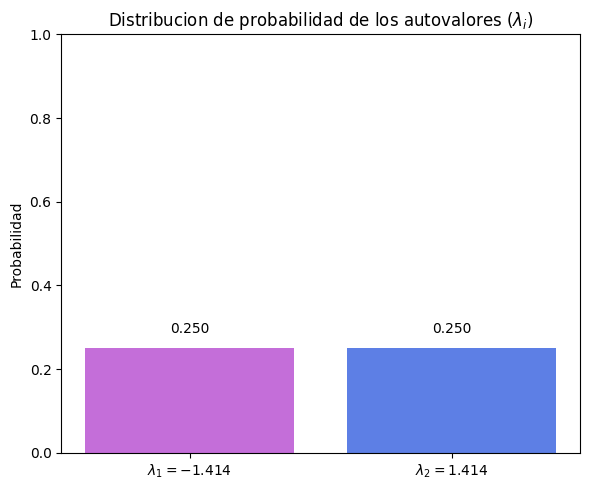


=== Ejercicio 4.3.2 completado ===


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ejercicio_432():
    """
    Ejercicio 4.3.2:
    Calcular las probabilidades de que el sistema colapse en cada autovector
    y el valor medio del observable, usando el observable del ejercicio 4.3.1.
    Luego, graficar la distribucion de probabilidad de los autovalores.
    """

    print("=== Ejercicio 4.3.2 ===")
    print("Calculo de probabilidades y valor medio\n")

    # Observable (del ejercicio 4.3.1)
    observable = np.array([
        [0, -1j*np.sqrt(2)],
        [1j*np.sqrt(2), 0]
    ], dtype=complex)

    print("Matriz observable (Ω):")
    print(observable)
    print()

    # Vector de estado inicial |ψ> = (1/2)[1, 1]
    estado = np.array([1/2, 1/2], dtype=complex)

    print("Vector de estado inicial |ψ> =", estado)
    print("Norma del estado =", np.linalg.norm(estado))
    print()

    # Calculo de autovalores y autovectores
    autovalores, autovectores = np.linalg.eigh(observable)

    print("=== Analisis espectral ===")
    print("Autovalores:", autovalores)
    print("Autovectores normalizados:")
    for i, autovec in enumerate(autovectores.T):
        print(f"|e{i+1}⟩ =", autovec)
    print()

    # Calculo de probabilidades de colapso
    print("=== Calculo de probabilidades ===")
    probabilidades = []
    for i, autovec in enumerate(autovectores.T):
        producto = np.vdot(autovec, estado)          # ⟨e_i|ψ⟩
        prob = np.abs(producto)**2                   # |⟨e_i|ψ⟩|²
        probabilidades.append(prob)
        print(f"p{i+1} = |⟨e{i+1}|ψ⟩|² = {prob:.4f}")

    print(f"Suma total de probabilidades = {sum(probabilidades):.4f}")
    print()

    # Calculo del valor medio (usando la distribucion de probabilidad)
    valor_medio = sum(p * l for p, l in zip(probabilidades, autovalores))
    print("=== Valor medio del observable ===")
    print(f"Valor medio (por distribucion) = {valor_medio:.4f}")

    # Verificacion directa ⟨ψ|Ω|ψ⟩
    valor_directo = np.real(np.vdot(estado, observable @ estado))
    print(f"Valor medio directo ⟨ψ|Ω|ψ⟩ = {valor_directo:.4f}")

    print(f"Coinciden ambos metodos: {np.isclose(valor_medio, valor_directo)}")

    # Graficar la distribucion de probabilidad de los autovalores
    etiquetas = [rf"$\lambda_{{{i+1}}} = {val:.3f}$" for i, val in enumerate(autovalores)]

    plt.figure(figsize=(6, 5))
    plt.bar(etiquetas, probabilidades, color=["mediumorchid", "royalblue"], alpha=0.85)
    plt.title(r"Distribucion de probabilidad de los autovalores ($\lambda_i$)")
    plt.ylabel("Probabilidad")
    plt.ylim(0, 1)

    for i, prob in enumerate(probabilidades):
        plt.text(i, prob + 0.03, f"{prob:.3f}", ha="center", va="bottom")

    plt.tight_layout()
    plt.show()


# Ejecutar el ejercicio
ejercicio_432()


###Ejercicio 4.4.1

Ejercicio 4.4.1: Verifique que las matrices dadas U₁ y U₂ son matrices unitarias, multiplíquelas y verifique que su producto también es unitario.

In [ ]:
import numpy as np

# === Definicion de las matrices ===
U1 = np.array([[0, 1],
               [1, 0]], dtype=complex)

U2 = np.array([[np.sqrt(2)/2,  np.sqrt(2)/2],
               [np.sqrt(2)/2, -np.sqrt(2)/2]], dtype=complex)

# === Funcion para verificar si una matriz es unitaria ===
def verificar_unitaria(U):
    """
    Verifica paso a paso si una matriz U es unitaria.
    Muestra U, su conjugada transpuesta, el producto U†U y U U†.
    """
    print("\n===============================")
    print("Matriz U:")
    print(np.round(U, 3))  # redondeamos

    # Calcular la adjunta (conjugada transpuesta)
    U_daga = np.conjugate(U.T)
    print("\nConjugada transpuesta (U†):")
    print(np.round(U_daga, 3))

    # Calcular los productos U†U y UU†
    producto_izq = U_daga @ U
    producto_der = U @ U_daga

    print("\nProducto U† * U:")
    print(np.round(producto_izq, 3))

    print("\nProducto U * U†:")
    print(np.round(producto_der, 3))

    # Comparar con la identidad
    identidad = np.eye(U.shape[0])
    es_unitaria = np.allclose(producto_izq, identidad) and np.allclose(producto_der, identidad)

    # Determinante (modulo)
    determinante = np.linalg.det(U)
    print(f"\nDeterminante = {determinante:.3f}, |det| = {abs(determinante):.3f}")

    # Resultado final
    if es_unitaria:
        print("La matriz es unitaria (U†U = I y UU† = I).")
    else:
        print("La matriz NO es unitaria.")

    return es_unitaria

# === Verificaciones ===
print("\n=== Verificacion de U1 ===")
verificar_unitaria(U1)

print("\n=== Verificacion de U2 ===")
verificar_unitaria(U2)

# === Producto de las dos matrices ===
U2U1 = U2 @ U1
print("\n=== Verificacion de la composicion (U2 * U1) ===")
verificar_unitaria(U2U1)



=== Verificacion de U1 ===

Matriz U:
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Conjugada transpuesta (U†):
[[0.-0.j 1.-0.j]
 [1.-0.j 0.-0.j]]

Producto U† * U:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Producto U * U†:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Determinante = -1.000+0.000j, |det| = 1.000
La matriz es unitaria (U†U = I y UU† = I).

=== Verificacion de U2 ===

Matriz U:
[[ 0.707+0.j  0.707+0.j]
 [ 0.707+0.j -0.707+0.j]]

Conjugada transpuesta (U†):
[[ 0.707-0.j  0.707-0.j]
 [ 0.707-0.j -0.707-0.j]]

Producto U† * U:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Producto U * U†:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Determinante = -1.000+0.000j, |det| = 1.000
La matriz es unitaria (U†U = I y UU† = I).

=== Verificacion de la composicion (U2 * U1) ===

Matriz U:
[[ 0.707+0.j  0.707+0.j]
 [-0.707+0.j  0.707+0.j]]

Conjugada transpuesta (U†):
[[ 0.707-0.j -0.707-0.j]
 [ 0.707-0.j  0.707-0.j]]

Producto U† * U:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Producto U * U†:
[[ 1.+0.j -0.+0.j]
 [-0.+0.j  1.+0.j]]

D

True

###Ejercicio 4.4.2

Evolucion del sistema de bolas de billar cuanticas en tres intervalos de tiempo con transformación unitaria modificada.

Se pide que partiendo del estado inicial [1, 0, 0, 0]ᵀ y aplicando la matriz unitaria 4×4 dada, determine el estado del sistema después de tres intervalos de tiempo, calcular la probabilidad de encontrar la bola cuántica en el punto 3.

In [3]:
import numpy as np


# Este operador define la evolucion del sistema cuántico
U = np.array([
    [0,               1/np.sqrt(2),  1/np.sqrt(2),   0],
    [1j/np.sqrt(2),   0,             0,              1/np.sqrt(2)],
    [1/np.sqrt(2),    0,             0,              1j/np.sqrt(2)],
    [0,               1/np.sqrt(2), -1/np.sqrt(2),   0]
], dtype=complex)


# El sistema comienza en la posicion 0 (ket |0⟩)
psi0 = np.array([1, 0, 0, 0], dtype=complex)


# Aplicamos el operador U repetidamente:
psi1 = U @ psi0
psi2 = U @ psi1
psi3 = U @ psi2

#Mostrar resultados
print("ψ(1) =", psi1)
print("ψ(2) =", psi2)
print("ψ(3) =", psi3)

# Calculo de probabilidades
# Las probabilidades se obtienen como el cuadrado del modulo de las amplitudes
print("Probabilidades ψ(3):", np.abs(psi3)**2)

# Probabilidad específica de estar en la posicion 3 (índice 3 en Python)
print("Probabilidad en posición índice 3:", np.abs(psi3[3])**2)


ψ(1) = [0.        +0.j         0.        +0.70710678j 0.70710678+0.j
 0.        +0.j        ]
ψ(2) = [ 0.5+0.5j  0. +0.j   0. +0.j  -0.5+0.5j]
ψ(3) = [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidades ψ(3): [0. 1. 0. 0.]
Probabilidad en posición índice 3: 0.0


###Ejercicio 4.5.2

Escribir el vector de estado generico para el sistema de dos partículas con espín. Generalícelo a un sistema con n partículas.

Este ejercicio aborda el ensamblaje de sistemas cuánticos mediante productos tensoriales para construir sistemas cuánticos complejos a partir de componentes más simples, tal como se describe en la seccion 4.5 del libro

In [4]:
import numpy as np
from typing import List

class MultiParticleQuantumSystem:
    """
    Representa un sistema cuantico de multiples particulas utilizando
    el producto tensorial de los espacios de Hilbert individuales.
    (Basado en el ejercicio 4.5.2)
    """

    def __init__(self, particle_dimensions: List[int]):
        self.particle_dimensions = particle_dimensions
        self.num_particles = len(particle_dimensions)
        self.total_dimension = np.prod(particle_dimensions)

    def demostrar_dos_particulas_spin(self):
        """
        Caso especifico: sistema de dos particulas con espin 1/2.
        """
        print("=== Sistema de dos particulas con espin 1/2 ===\n")
        base_spin = ["|↑↑⟩", "|↑↓⟩", "|↓↑⟩", "|↓↓⟩"]
        for i, estado in enumerate(base_spin):
            print(f"|{i}⟩ = {estado}")

        print("\nVector de estado generico:")
        print("|ψ⟩ = c0|↑↑⟩ + c1|↑↓⟩ + c2|↓↑⟩ + c3|↓↓⟩")
        print("Condicion de normalizacion: |c0|² + |c1|² + |c2|² + |c3|² = 1\n")

    def generalizar_a_n_particulas(self, n: int, dimension_particula: int = 2):
        """
        Generaliza el vector de estado a un sistema de n particulas.
        """
        dimension_total = dimension_particula ** n
        print(f"=== Generalizacion a {n} particulas ===")
        print(f"Cada particula tiene dimension: {dimension_particula}")
        print(f"Dimension total del sistema: {dimension_total}\n")

        print("|ψ⟩ = Σ(i1,i2,...,in) c_(i1,i2,...,in) |i1⟩⊗|i2⟩⊗...⊗|in⟩")
        print("Donde cada ij pertenece a {0, 1, ..., dimension_particula-1}")
        print("y Σ |c_(i1,i2,...,in)|² = 1\n")

    def demostrar_entrelazamiento(self):
        """
        Demuestra que el estado |ψ⟩ = |x0⊗y0⟩ + |x1⊗y1⟩ no puede
        escribirse como producto tensorial de dos estados separados.
        """
        print("=== Demostracion de entrelazamiento ===\n")

        # Base computacional de dos particulas
        base = [
            np.array([1, 0, 0, 0]),  # |x0⊗y0⟩
            np.array([0, 1, 0, 0]),  # |x0⊗y1⟩
            np.array([0, 0, 1, 0]),  # |x1⊗y0⟩
            np.array([0, 0, 0, 1])   # |x1⊗y1⟩
        ]

        # Estado entrelazado (sin normalizar)
        psi = base[0] + base[3]
        psi = psi / np.linalg.norm(psi)

        print("Estado entrelazado:")
        print("|ψ⟩ = (1/√2)(|x0⊗y0⟩ + |x1⊗y1⟩)\n")

        # Intento de separacion (matriz de coeficientes)
        coef = np.array([[1, 0],
                         [0, 1]])

        # Si fuera separable, la matriz tendria rango 1
        rango = np.linalg.matrix_rank(coef)
        print(f"Rango de la matriz de coeficientes: {rango}")

        if rango > 1:
            print("El estado no es separable → es un estado entrelazado.")
        else:
            print("El estado es separable.")


# === Ejecucion del ejercicio 4.5.2 ===
def resolver_ejercicio_452():
    print("=== Ejercicio 4.5.2: Sistemas cuanticos multiparticula ===\n")

    sistema = MultiParticleQuantumSystem([2, 2])
    sistema.demostrar_dos_particulas_spin()
    sistema.generalizar_a_n_particulas(3, 2)
    sistema.generalizar_a_n_particulas(4, 2)
    sistema.demostrar_entrelazamiento()

resolver_ejercicio_452()


=== Ejercicio 4.5.2: Sistemas cuanticos multiparticula ===

=== Sistema de dos particulas con espin 1/2 ===

|0⟩ = |↑↑⟩
|1⟩ = |↑↓⟩
|2⟩ = |↓↑⟩
|3⟩ = |↓↓⟩

Vector de estado generico:
|ψ⟩ = c0|↑↑⟩ + c1|↑↓⟩ + c2|↓↑⟩ + c3|↓↓⟩
Condicion de normalizacion: |c0|² + |c1|² + |c2|² + |c3|² = 1

=== Generalizacion a 3 particulas ===
Cada particula tiene dimension: 2
Dimension total del sistema: 8

|ψ⟩ = Σ(i1,i2,...,in) c_(i1,i2,...,in) |i1⟩⊗|i2⟩⊗...⊗|in⟩
Donde cada ij pertenece a {0, 1, ..., dimension_particula-1}
y Σ |c_(i1,i2,...,in)|² = 1

=== Generalizacion a 4 particulas ===
Cada particula tiene dimension: 2
Dimension total del sistema: 16

|ψ⟩ = Σ(i1,i2,...,in) c_(i1,i2,...,in) |i1⟩⊗|i2⟩⊗...⊗|in⟩
Donde cada ij pertenece a {0, 1, ..., dimension_particula-1}
y Σ |c_(i1,i2,...,in)|² = 1

=== Demostracion de entrelazamiento ===

Estado entrelazado:
|ψ⟩ = (1/√2)(|x0⊗y0⟩ + |x1⊗y1⟩)

Rango de la matriz de coeficientes: 2
El estado no es separable → es un estado entrelazado.


###Ejercicio 4.5.3

Supongamos el mismo escenario que en el Ejemplo 4.5.2 y sea |φ⟩ = |x₀⟩⊗|y₁⟩ + |x₁⟩⊗|y₁⟩. ¿Es este estado separable?

Este ejercicio analiza la separabilidad de estados cuanticos, determinando si un estado dado puede escribirse como un producto tensorial de estados de particulas individuales o si representa un sistema entrelazado.

In [5]:
import numpy as np

# === Ejercicio 4.5.3 ===
# Estado dado: |φ⟩ = |x₀⟩⊗|y₁⟩ + |x₁⟩⊗|y₁⟩

# Representación en la base estandar:
# |x₀⟩⊗|y₀⟩, |x₀⟩⊗|y₁⟩, |x₁⟩⊗|y₀⟩, |x₁⟩⊗|y₁⟩
phi = np.array([0, 1, 0, 1], dtype=complex)

# Forma matricial del estado (para verificar separabilidad)
# M_phi = [[c00, c01],
#          [c10, c11]]
M_phi = np.array([[0, 1],
                  [0, 1]], dtype=complex)

# Criterio de separabilidad:
# Un estado es separable si el determinante de M_phi es 0.
determinante = np.linalg.det(M_phi)

print("=== Ejercicio 4.5.3 ===")
print("|φ⟩ = |x₀⟩⊗|y₁⟩ + |x₁⟩⊗|y₁⟩")
print("\nMatriz del estado:\n", M_phi)
print(f"\nDeterminante = {determinante}")

if np.isclose(determinante, 0):
    print("\n El estado es SEPARABLE.")
    print("Factorización: |φ⟩ = (|x₀⟩ + |x₁⟩) ⊗ |y₁⟩")
else:
    print("\n El estado es ENTRELZADO.")


=== Ejercicio 4.5.3 ===
|φ⟩ = |x₀⟩⊗|y₁⟩ + |x₁⟩⊗|y₁⟩

Matriz del estado:
 [[0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j]]

Determinante = 0j

 El estado es SEPARABLE.
Factorización: |φ⟩ = (|x₀⟩ + |x₁⟩) ⊗ |y₁⟩
